In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [81]:
df = pd.read_csv("Untitled spreadsheet - Sheet1.csv")

In [82]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [84]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [85]:
df.drop('Unnamed: 0', inplace=True, axis=1)

# Exploratory Data Analysis

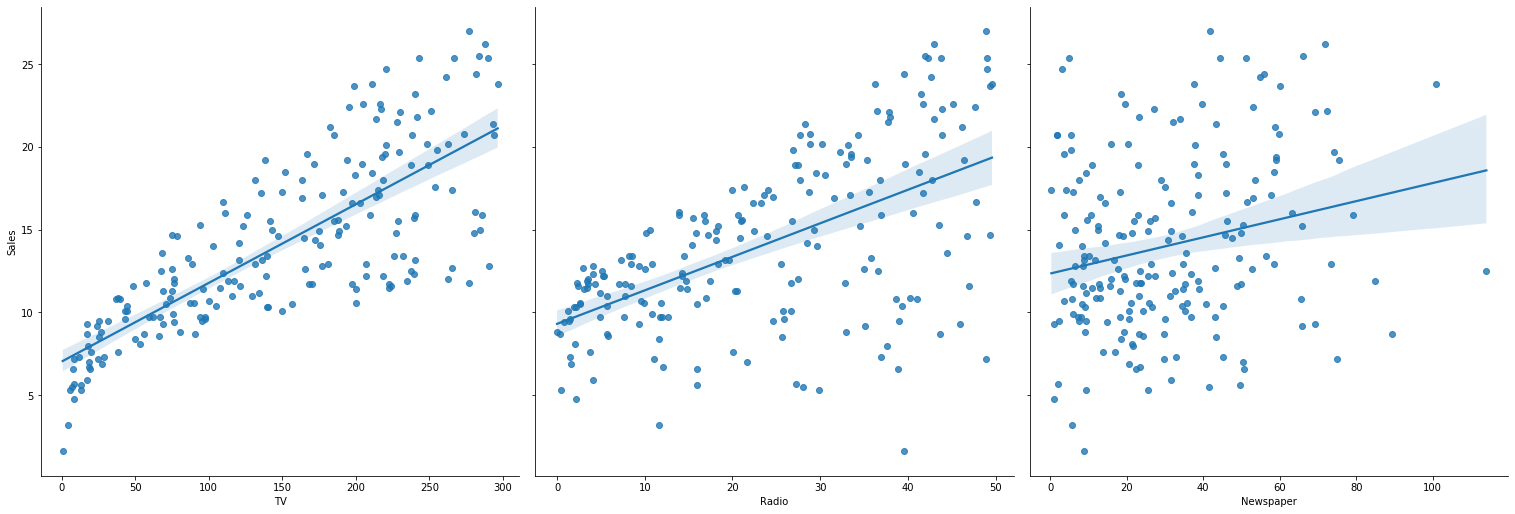

In [86]:
sns.pairplot(data=df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg', height=7)

In [87]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Spliting data 

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=33,test_size=0.2)

# Model Selection and Training

In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [90]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction

In [91]:
pred = model.predict(X_test)

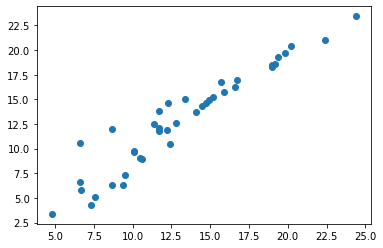

In [94]:
plt.scatter(y_test,pred)

# Model Evaluation 

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print('MAE', mean_absolute_error(y_test,pred))
print('MSE', mean_squared_error(y_test,pred))
print('R2', r2_score(y_test,pred))

MAE 1.0937479947618574
MSE 2.3219807003843824
R2 0.8937288845297463


# Coefficient Interpretation

In [95]:
print("TV : ", model.coef_[0])
print("Radio : ", model.coef_[1])
print("Newspaper : ", model.coef_[2])

TV :  0.0465200286902099
Radio :  0.19313293129043915
Newspaper :  0.0017581580336504718


# Feature Selection

* So, a unit increase in TV ad expenditure, increases the sale by 0.046 units, i.e for increase in expenditure of USD 1000 on TV ad, increases the sale by 46.5 items.
* And since, increase in Newspaper ad expenditure by USD 1000, increases sales by 1.7 items, which is pretty less. So, dropping the Newspaper in feature selection

In [99]:
X1 = df[['TV', 'Radio']]
y1 = df['Sales']

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=33,test_size=0.2)

In [101]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
pred = model.predict(X_test)

In [103]:
print('MAE', mean_absolute_error(y_test,pred))
print('MSE', mean_squared_error(y_test,pred))
print('R2', r2_score(y_test,pred))

MAE 1.0925185321237976
MSE 2.302765091247955
R2 0.894608333793485


In [104]:
print("TV : ", model.coef_[0])
print("Radio : ", model.coef_[1])

TV :  0.046544744524799155
Radio :  0.1939217646597961


# Conclusion

After dropping the Newspaper variable, the R2 score of model has increased from 89.37% to 89.46%. 